# 비비빅 학습동아리 3회차_스터디
 - 2024.4.24.(수) 18:30~20:00
 - 데이터셋 만들기(계속)
 - 머신러닝 설명 + 약간의 수학
 - 데이터셋 분할하기 - 테스트 세트와 검증세트

### 데이터셋 만들기
- 아이리스 데이터로 데이터셋 만들어보기

In [3]:
## 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import sys
sys.version

'3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]'

In [4]:
# 데이터셋 만들기
a = load_iris()
X, y, x_nm, y_nm = a.data, a.target, a.feature_names , a.target_names
# 피처 데이터를 데이터프레임으로 변환
df = pd.DataFrame(data=X, columns=x_nm)     
df['target'] = y                            # 타겟 데이터를 데이터프레임에 추가
# df['species'] = df['target'].map({i: name for i, name in enumerate(y_nm)})   ## 종명을 추가하기
# 데이터프레임 출력
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# csv로 저장하기
df.to_csv('iris.csv', index=False)     # df.read_csv('')

# IRIS 붓꽃 데이터란?
붓꽃(Iris) 데이터셋은 통계학과 데이터 마이닝 분야에서 가장 유명하고 널리 사용되는 데이터셋 중 하나입니다. 이 데이터셋은 영국의 생물학자이자 통계학자인 로널드 피셔(Ronald A. Fisher)가 1936년에 발표한 논문에서 처음 소개되었습니다.

### 논문 정보
논문 제목: "The use of multiple measurements in taxonomic problems" (분류 문제에서의 다중 측정값 사용)
저자: Ronald A. Fisher
발표 연도: 1936년
주제: 이 논문은 분류학적 문제, 특히 종을 구분하는 데 있어서 여러 측정치를 활용하는 방법에 대해 다룹니다. Fisher는 세 개의 붓꽃 종(세토사, 버시컬러, 버지니카)에 대한 꽃잎과 꽃받침의 길이와 너비를 측정한 데이터를 사용하여, 이러한 특성이 어떻게 종 간 구분에 활용될 수 있는지 분석했습니다.

### 데이터셋의 중요성
Fisher의 붓꽃 데이터셋은 통계학, 기계 학습, 패턴 인식 분야에서 분류 알고리즘을 설명하고 시험하는 데 오랫동안 사용되어 왔습니다. 이 데이터셋은 간단하면서도 패턴을 인식하고 분류 문제에 접근하는 데 있어 기본적인 도전을 제시하기 때문에, 데이터 과학과 기계 학습을 배우는 학생들과 전문가들에게 이상적인 예제로 여겨집니다.

### 데이터셋의 구성
붓꽃 데이터셋은 총 150개의 샘플로 구성되어 있으며, 이는 세토사(Setosa), 버시컬러(Versicolor), 버지니카(Virginica)라는 세 가지 붓꽃 종 각각 50개씩의 샘플로 이루어져 있습니다. 각 샘플에 대해 꽃잎(petal)의 길이와 너비, 꽃받침(sepal)의 길이와 너비 총 네 가지 특성이 측정되었습니다.

Fisher의 붓꽃 데이터셋은 분류 알고리즘의 효과를 입증하고, 다양한 통계적 방법론을 탐색하는 데 중요한 역할을 했으며, 현재까지도 기계 학습 분야의 교육 및 연구에 널리 사용되고 있습니다.

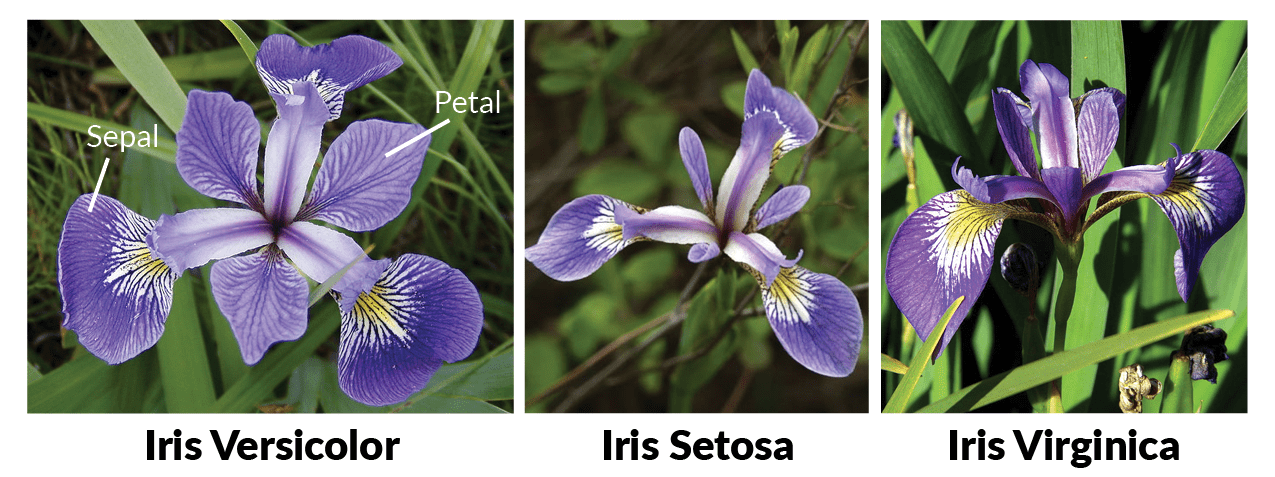

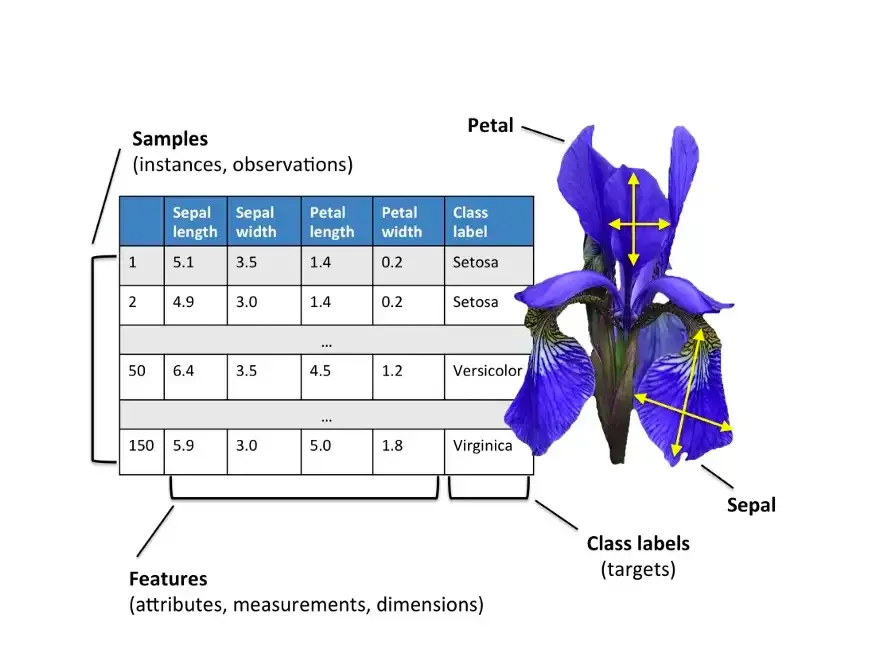

### 문제의 그 논문
[the use of multiple measurements in taxonomic problems.pdf](http://syllabus.cs.manchester.ac.uk/pgt/2021/COMP61021/reference/Fisher-DA.pdf)


# 데이터셋 준비하기
- 일러두기)연습용 데이터를 스스로 만드는 과정입니다!
- 현재 단계는 현업과는 조금 거리가 있기는 하지만, 파이썬을 이해하는데 도움이 됩니다.

In [6]:
# 사이킷런 데이터분할 라이브러리
from sklearn.model_selection import train_test_split

df = pd.read_csv('iris.csv')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 데이터 시각화
- matplotlib와 sns 사용
- 출처) ML from Scratch with IRIS!! K_F
    - https://www.kaggle.com/code/yungbyun/ml-from-scratch-with-iris-k-f

In [9]:
# 라이브러리 임포트
## seaborn은 sns로
## matplotlib는 plt로
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
# 상관 행렬 데이터 코릴레이션
corr_matrix = df.iloc[:,0:4].corr()
corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


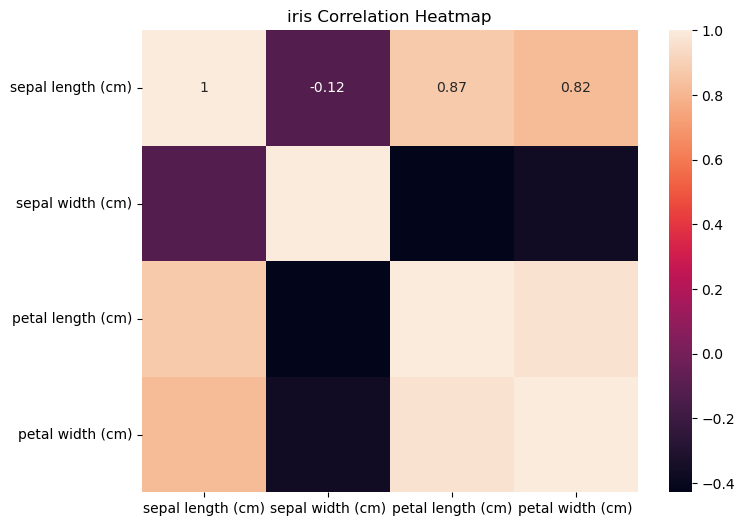

In [24]:
# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='rocket')
plt.title('iris Correlation Heatmap')
plt.show()

### corr() 결과해석
 - 대각선 값은 각 피처 자신에 대한 상관 관계를 나타냅니다. 이 값은 항상 1입니다.
    - 예를 들어, 꽃받침 길이와 꽃받침 길이의 상관 관계는 자기 자신이므로 항상 1입니다.

 - 대각선을 기준으로 대칭인 값들은 각 피처들 간의 상관 관계를 나타냅니다.
    - 예를 들어, 꽃받침 길이와 꽃받침 너비의 상관 관계는 -0.117570으로, 약한 음의 상관 관계를 가집니다.

 - 값이 1에 가까울수록 두 변수 간의 강한 선형 관계를 나타냅니다.
    -예를 들어, 꽃받침 길이와 꽃잎 길이의 상관 관계는 0.871754로, 강한 양의 선형 관계를 가집니다.

 - 값이 0에 가까울수록 두 변수 간의 선형적인 관계가 적거나 없음을 의미합니다.
    - 예를 들어, 꽃받침 길이와 꽃받침 너비의 상관 관계는 -0.117570으로, 거의 선형 관계가 없음을 나타냅니다.

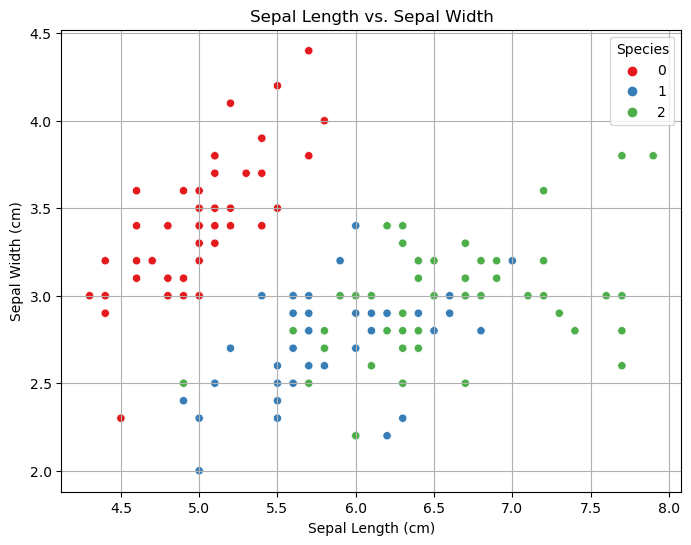

In [43]:
# 산점도 그리기
plt.figure(figsize=(8, 6))  # 플롯의 크기 설정
sns.scatterplot(data = df, x=df.columns[0], y=df.columns[1], hue=df.columns[4], palette='Set1')  # Seaborn의 scatterplot 함수를 사용하여 산점도 그리기
# x=df.columns[0], y=df.columns[1] 부분을 바꿔가며 분포 확인 0~3까지 조합해보자.

plt.title('Sepal Length vs. Sepal Width')  # 플롯 제목 설정
plt.xlabel('Sepal Length (cm)')  # x축 레이블 설정
plt.ylabel('Sepal Width (cm)')  # y축 레이블 설정
plt.legend(title='Species')  # 범례 추가
plt.grid(True)  # 그리드 표시
plt.show()  # 플롯 출력

<Axes: xlabel='sepal length (cm)', ylabel='Density'>

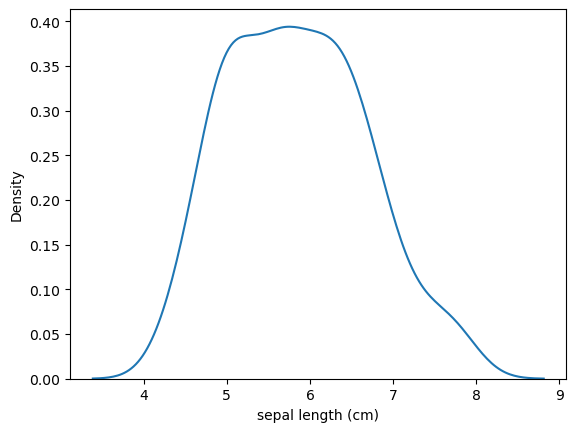

In [41]:
#커널밀도함수 kde
sns.kdeplot(df[df.columns[0]])

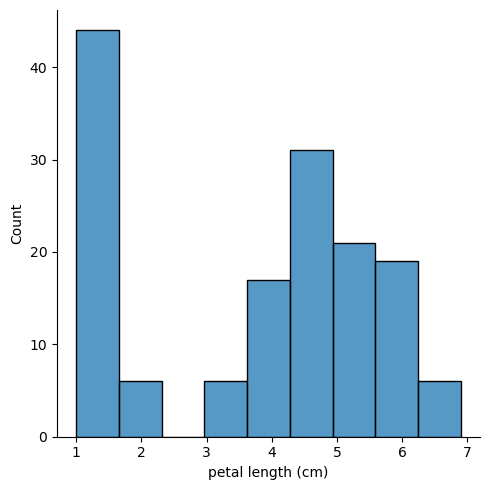

In [59]:
# 종별 데이터 수?
## also df 반복문제를 해결해보자
axe_column = 2    # 숫자만 바꿔서 입력해보자. 
axe=df[df.columns[axe_column]]
sns.displot(col)

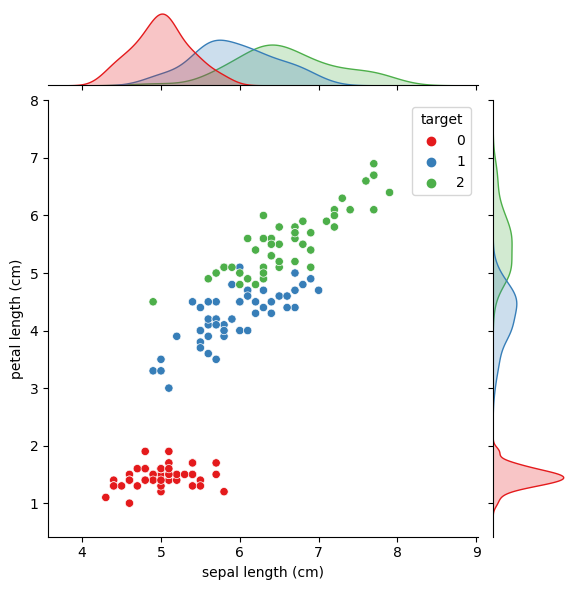

In [65]:
# 조인트 플롯
## also df 반복문제를 해결해보자
axe_column_x = 0    # 숫자만 바꿔서 입력해보자. 
axe_column_y = 2    # 숫자만 바꿔서 입력해보자. 
axe_column_t = 4    # 타겟
axe_x=df[df.columns[axe_column_x]]
axe_y=df[df.columns[axe_column_y]]
axe_t=df[df.columns[axe_column_t]]
sns.jointplot(x=axe_x, y=axe_y, hue=axe_t, palette='Set1')

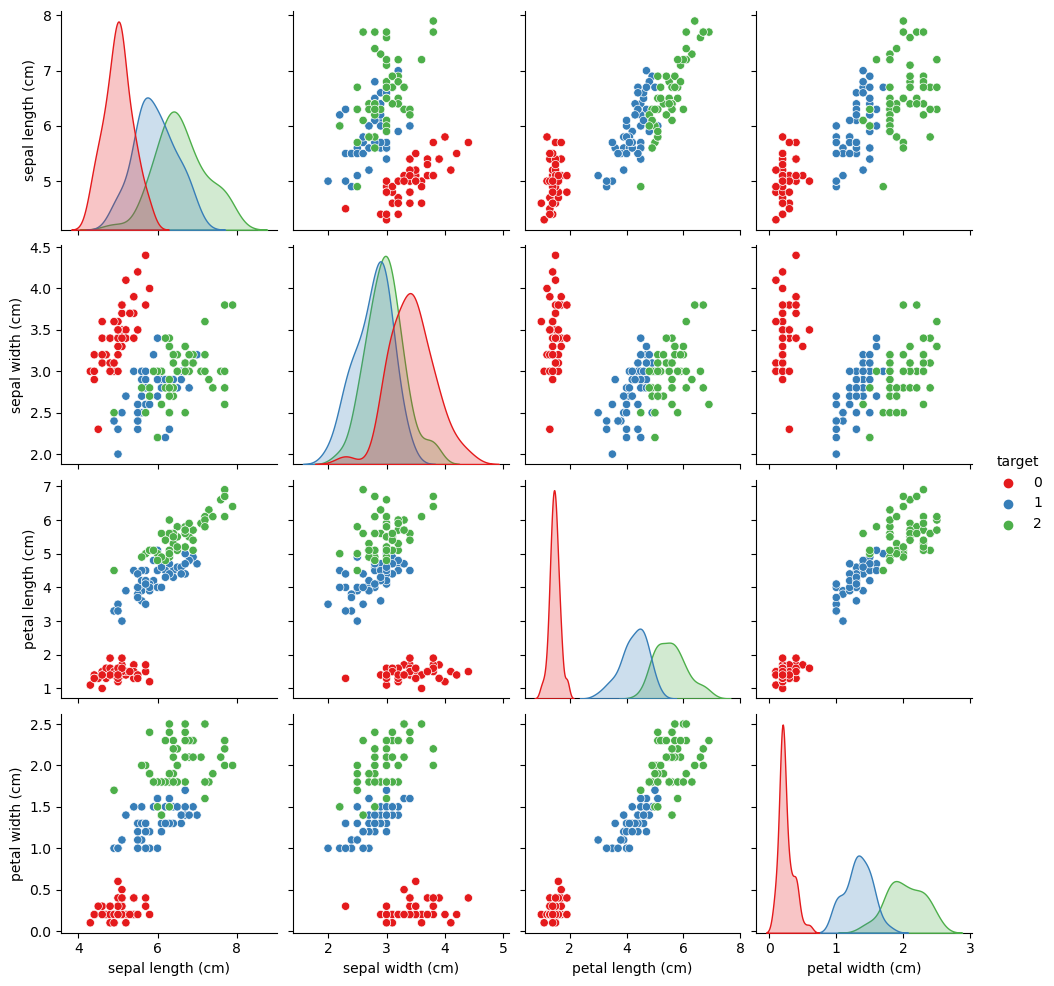

In [81]:
# pairplot
df_data   = df[df.columns[0:5]]
df_target = df.columns[4]
sns.pairplot(df_data, hue=df_target, palette='Set1')  # 같은 컬럼이 만나는 대각선에는 스캐터플롯 대신 히스토그램이 그려져 있다.

## 데이터 분할하기

In [82]:
# 분할하기 #대상변수의 종류가 4개인 이유?
X = df.iloc[:, :4]  # iloc[행rows,열colulmns]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [83]:
list = [X_train, X_test, y_train, y_test]
# 데이터 탐색
for a in list:
    a.info()

    a.describe()

    display(a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 8 to 3
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  120 non-null    float64
 1   sepal width (cm)   120 non-null    float64
 2   petal length (cm)  120 non-null    float64
 3   petal width (cm)   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3
...,...,...,...,...
37,4.9,3.6,1.4,0.1
2,4.7,3.2,1.3,0.2
33,5.5,4.2,1.4,0.2
52,6.9,3.1,4.9,1.5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 38 to 28
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  30 non-null     float64
 1   sepal width (cm)   30 non-null     float64
 2   petal length (cm)  30 non-null     float64
 3   petal width (cm)   30 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
38,4.4,3.0,1.3,0.2
127,6.1,3.0,4.9,1.8
57,4.9,2.4,3.3,1.0
93,5.0,2.3,3.3,1.0
42,4.4,3.2,1.3,0.2
56,6.3,3.3,4.7,1.6
22,4.6,3.6,1.0,0.2
20,5.4,3.4,1.7,0.2
147,6.5,3.0,5.2,2.0
84,5.4,3.0,4.5,1.5


<class 'pandas.core.series.Series'>
Int64Index: 120 entries, 8 to 3
Series name: target
Non-Null Count  Dtype
--------------  -----
120 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


8      0
106    2
76     1
9      0
89     1
      ..
37     0
2      0
33     0
52     1
3      0
Name: target, Length: 120, dtype: int64

<class 'pandas.core.series.Series'>
Int64Index: 30 entries, 38 to 28
Series name: target
Non-Null Count  Dtype
--------------  -----
30 non-null     int64
dtypes: int64(1)
memory usage: 480.0 bytes


38     0
127    2
57     1
93     1
42     0
56     1
22     0
20     0
147    2
84     1
107    2
141    2
104    2
51     1
7      0
49     0
14     0
69     1
63     1
138    2
10     0
140    2
58     1
134    2
132    2
77     1
75     1
18     0
116    2
28     0
Name: target, dtype: int64

In [84]:
# 답지를 저장해보자
#list = [X_train, X_test, y_train, y_test]
X_test.to_csv('iris_x_test.csv')     # df.read_csv('')
y_test.to_csv('iris_y_test.csv')     # df.read_csv('')
# 이렇게 해서 데이터셋 준비가 끝남.
# x_test로 pred() 수행 후 y_test로 성능평가 함.